In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Sales Data.csv')
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [3]:
df.shape

(185950, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB


In [5]:
df.describe()

,Unnamed: 0,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,8340.388475,230417.569379,1.124383,184.399735,7.059140,185.490917,14.413305
std,5450.554093,51512.737110,0.442793,332.731330,3.502996,332.919771,5.423416
min,0.000000,141234.000000,1.000000,2.990000,1.000000,2.990000,0.000000
25%,3894.000000,185831.250000,1.000000,11.950000,4.000000,11.950000,11.000000
50%,7786.000000,230367.500000,1.000000,14.950000,7.000000,14.950000,15.000000
75%,11872.000000,275035.750000,1.000000,150.000000,10.000000,150.000000,19.000000
max,25116.000000,319670.000000,9.000000,1700.000000,12.000000,3400.000000,23.000000


In [6]:
df.columns

Index(['Unnamed: 0', 'Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Order Date', 'Purchase Address', 'Month', 'Sales', 'City', 'Hour'],
      dtype='object')

# Data cleaning and Preprocessing

In [7]:
df.drop_duplicates(inplace=True)

In [10]:
df['Order Date']=pd.to_datetime(df['Order Date'])

In [12]:
df['Month']=df['Order Date'].dt.month

In [13]:
df['Sales']=df['Quantity Ordered']*df['Price Each']

# Exploratory Data Analysis(EDA)

In [14]:
df.describe()

,Unnamed: 0,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,8340.388475,230417.569379,1.124383,184.399735,7.059140,185.490917,14.413305
std,5450.554093,51512.737110,0.442793,332.731330,3.502996,332.919771,5.423416
min,0.000000,141234.000000,1.000000,2.990000,1.000000,2.990000,0.000000
25%,3894.000000,185831.250000,1.000000,11.950000,4.000000,11.950000,11.000000
50%,7786.000000,230367.500000,1.000000,14.950000,7.000000,14.950000,15.000000
75%,11872.000000,275035.750000,1.000000,150.000000,10.000000,150.000000,19.000000
max,25116.000000,319670.000000,9.000000,1700.000000,12.000000,3400.000000,23.000000


In [15]:
df.dtypes

Unnamed: 0                   int64
Order ID                     int64
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int64
Sales                      float64
City                        object
Hour                         int64
dtype: object

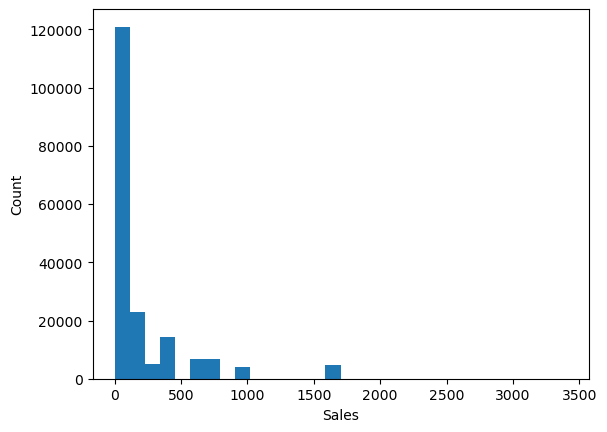

In [17]:
plt.hist(df['Sales'],bins=30)
plt.xlabel('Sales')
plt.ylabel('Count')
plt.show()

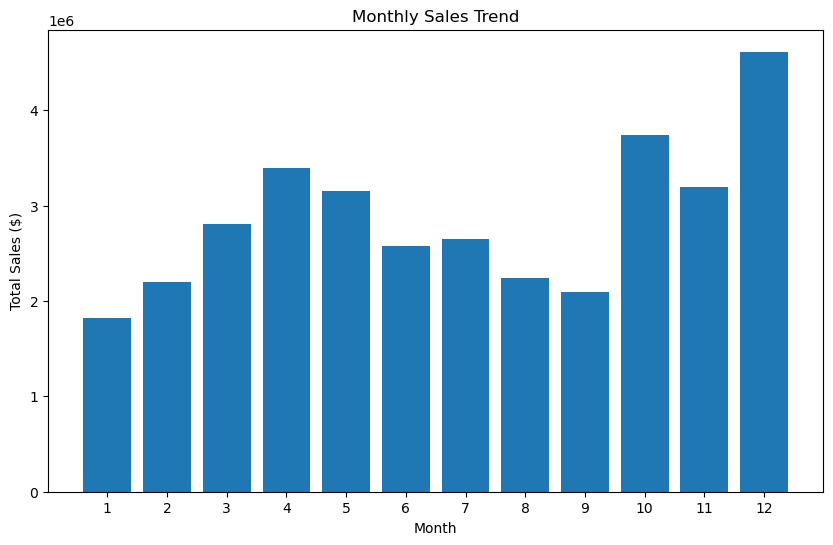

In [18]:
Monthly_sales=df.groupby('Month')['Sales'].sum()
months=range(1,13)
plt.figure(figsize=(10,6))
plt.bar(months, Monthly_sales)
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.title('Monthly Sales Trend')
plt.xticks(months)
plt.show()

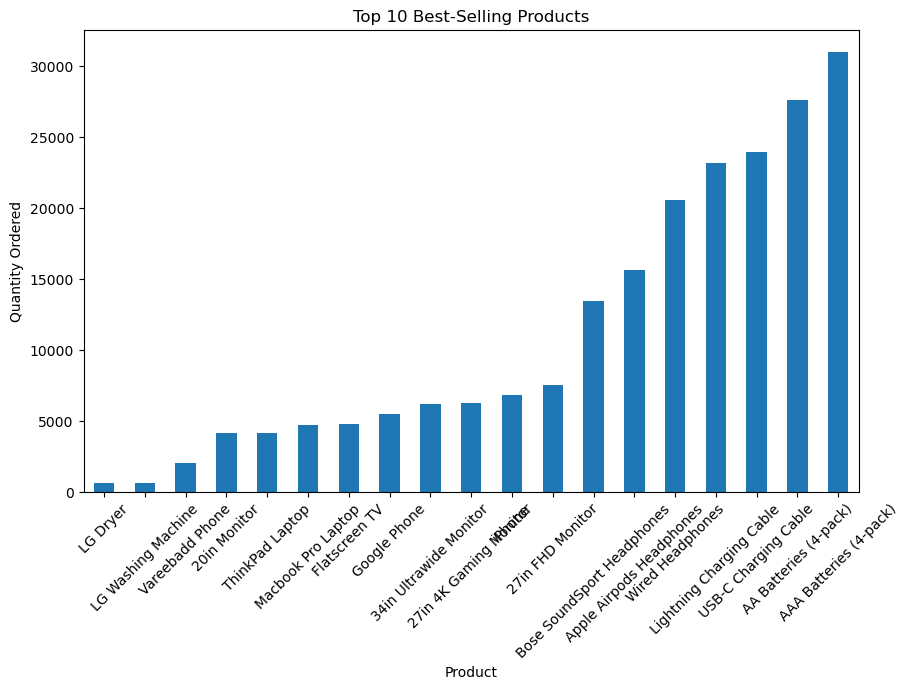

In [20]:
Top_products=df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=True)
plt.figure(figsize=(10,6))
Top_products.plot(kind='bar')
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.title('Top 10 Best-Selling Products')
plt.xticks(rotation=45)
plt.show()

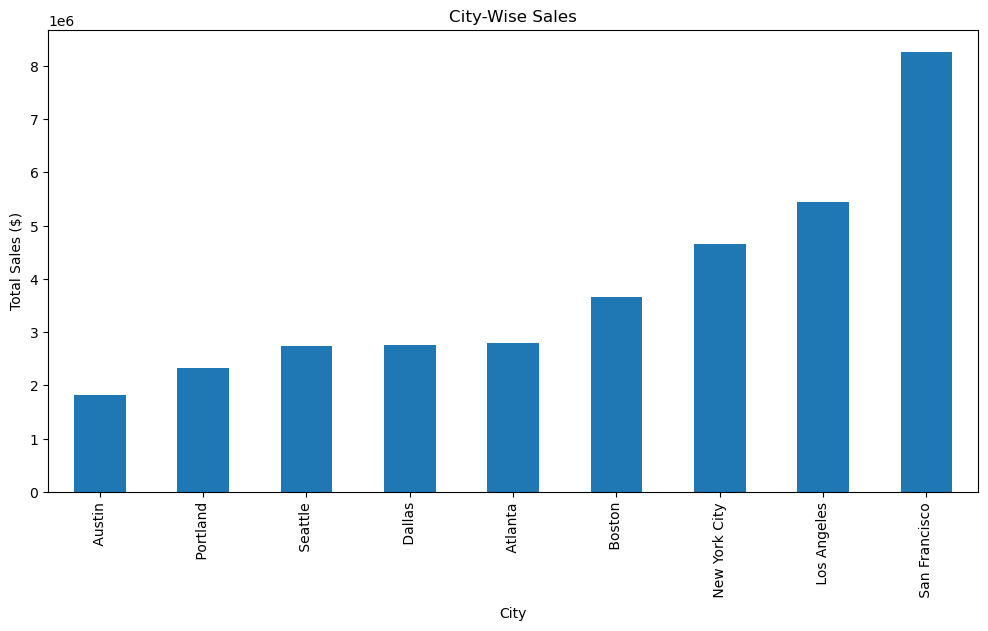

In [21]:
City_sales=df.groupby('City')['Sales'].sum().sort_values(ascending=True)
plt.figure(figsize=(12,6))
City_sales.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Total Sales ($)')
plt.title('City-Wise Sales')
plt.xticks(rotation=90)
plt.show()

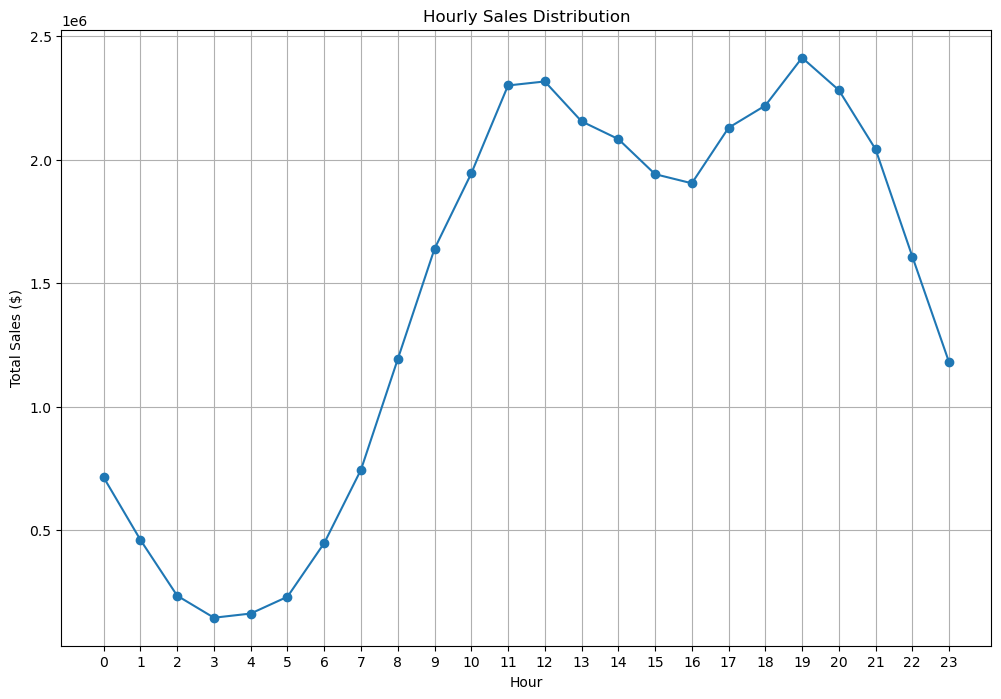

In [23]:
Hourly_sales=df.groupby('Hour')['Sales'].sum()
plt.figure(figsize=(12,8))
plt.plot(Hourly_sales.index,Hourly_sales.values, marker='o')
plt.xlabel('Hour')
plt.ylabel('Total Sales ($)')
plt.title('Hourly Sales Distribution')
plt.xticks(Hourly_sales.index)
plt.grid(True)
plt.show()

In [ ]:
Project: Sales Data Analysis
🔍 Purpose: Analyze sales data to identify trends, top-selling products, and revenue metrics for business decision-making.
📈 Description:
In my role as an intern at Meri Skill, I had the opportunity to work on the captivating project, "Sales Data Analysis." This project allowed me to harness the power of data to provide valuable insights crucial for informed business decisions.
Throughout the project, I delved into a vast sales dataset, employing various data analysis techniques to uncover trends, patterns, and opportunities. I was responsible for identifying top-selling products, tracking sales performance over time, and calculating critical revenue metrics, including total sales and profit margins.
One of the highlights of this project was the creation of insightful visualizations to effectively communicate findings. Utilizing data visualization tools, I was able to present complex data in a clear and compelling manner, making it easier for stakeholders to grasp the information and act upon it.
This experience not only honed my data manipulation and analysis skills but also demonstrated my ability to extract actionable insights from extensive datasets. As a result, I was able to contribute to data-driven recommendations aimed at optimizing sales strategies and improving business performance.
The "Sales Data Analysis" project at Meri Skill was a fantastic opportunity to put theory into practice and develop practical expertise in the field of data analytics. I'm grateful for the chance to be part of this project and excited to continue learning and applying my skills to real-world challenges.